# Distribuciones de Probabilidad

## Fuentes de incertidumbre en ML

- **datos**: Incertidumbre proveniente del margen de error que tienen los instrumentos de medicion
- **atributos del modelo**: Son variables que representan un subconjunto reducido de toda la realidad del problema. Ademas pueden posteriormente ser mas reducidas, sesgando mas el resultado
- **Arquitectura del modelo**: Un modelo en mates es una representación simplificada de la realidad, lo cual hace que haya incertidumbre

# Distribuciones de probabilidad discretas

## Distribucion de Bernoulli

*Esta distribucion permite describir ocurrencias con variables binarias.*

*Ej: Lanzamiento de una moneda*

- *La probabilidad de ocurrencia del primer evento es **P***

- *La probabilidad de ocurrencia del segundo evento es **1 - P***

<img src="image-20221227-092744.png" alt="drawing" style="width:400px;"/>

## Distribucion Binomial

Cuando hay secuencias repetitivas de varios eventos binarios (o eventos de bernoulli) se genera otra distribucion. Conocida como la distribucion binomial.

*Ejemplo:*

*Dados tres lanzamientos, cual es la probabilidad de obtener dos caras?*

*en la imagen abajo se observa la respuesta*

<img src="image-20221227-093411.png" alt="drawing" style="width:600px;"/>


- *Se observa que el espacio muestral arroja **8 posibles resultados**.*
- *Solo **en 3 de esos 8 se obtienen dos caras**.*

Ahora, si se quiere la probabilidad de obtener **k caras** dados **n lanzamientos**, la formula general es: 

$P(k_{caras} | n_{lanzamientos} ) = P(k,n;p)$

*es igual a:*

$P(k,n;p) = \binom{n}{k}p^{k}(1-p)^{n-k}$

*Recordar la formula de la combinatoria:*

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

***Por lo cual la formula final es:***

$P(k,n;p) = \frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$


donde k es el numero de caras, n es el numero de lanzamientos y p es la probabilidad del evento (1/2 para el caso de las monedas)

Entonces, retomando el mismo calculo que se hizo previamente:

*Dados tres lanzamientos, cual es la probabilidad de obtener dos caras?*

*Solucion:*


*Recordemos que la formula general para la distribucion es:*

$P(k,n;p) = \binom{n}{k}p^{k}(1-p)^{n-k}$ = $\frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$

*Al reemplazar los valores, se obtiene:*

=> $P(2;3,\frac{1}{2})$ 
= $\frac{3!}{2!(3-2)!}\frac{1}{2}^{2}(1-\frac{1}{2})^{3-2}$ 
= $(\frac{6}{2})(\frac{1}{4})(\frac{1}{2})$ 

= $\frac{3}{8}$
=

**Se observa que el resultado es el mismo**

### Distribucion Binomial en Python

*A continuacion se explican dos llibrerias que recrean una distribucion binomial,*

- ***Scipy**, que calcula las probabilidades basado en la formula general de la distribucion (entrega datos teoricos):*
$P(k,n;p) = \frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$
- ***Numpy**, que recrea los experimentos con funciones aleatorias (entrega datos experimentales)*

**Pero antes de ir con las librerias, hagamoslo manual ;)**

In [ ]:
from math import factorial

*Recordando la formula de la ecuacion:*

$P(k,n;p) = \frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$

*Hagamos una funcion que simule esta formula:*

In [ ]:
def my_binomial(k, n, p):
    return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p,n-k)

*y verificamos con el ejercicio que se resolvio manualmente arriba:*

In [ ]:
my_binomial(2, 3, 0.5)

0.375

*dado que $3/8 = 0.375$, el resultado es correcto*

### Distribucion binomial de scipy

*Esta libreria permite construir la distribucion dado:*

*- un numero de intentos*
*- la probabilidad p*

***Se recrea el ejercicio:***
- ***Al lanzar tres monedas.***
- ***Cual es la posibilidad de obtener dos caras?***

In [ ]:
from scipy.stats import binom

# Se define la distribucion, 3 experimentos, 0.5 probabilidad de exito
dist = binom(3, 0.5)

*Para obtener la probabilidad de tener 2 exitos uso el atributo **.pmf()** (probability mass function)*

*especificando dos exitos*

In [ ]:
dist.pmf(2)

0.3750000000000001

*Y se obtiene el mismo resultado $1/8$.*

*Si se quiere ver la probabilidad de cada caso, podemos hacer el calculo:*

In [ ]:
values = [0,1,2,3]
probabilities=[binom(3, 0.5).pmf(k) for k in values]
print("Para ",values[0], " de 3 eventos exitosos, la probabilidad de ocurrencia es ", probabilities[0] )
print("Para ",values[1], " de 3 eventos exitosos, la probabilidad de ocurrencia es ", probabilities[1] )
print("Para ",values[2], " de 3 eventos exitosos, la probabilidad de ocurrencia es ", probabilities[2] )
print("Para ",values[3], " de 3 eventos exitosos, la probabilidad de ocurrencia es ", probabilities[3] )

Para  0  de 3 eventos exitosos, la probabilidad de ocurrencia es  0.125
Para  1  de 3 eventos exitosos, la probabilidad de ocurrencia es  0.3750000000000001
Para  2  de 3 eventos exitosos, la probabilidad de ocurrencia es  0.3750000000000001
Para  3  de 3 eventos exitosos, la probabilidad de ocurrencia es  0.125


***Se recrea otro ejercicio:***
- ***Al lanzar tres monedas.***
- ***Cual es la posibilidad de obtener DOS CARAS O MENOS?***

*Ahora, para obtener la probabilidad de tener 2 exitos o menos uso el atributo **.cdf()** (cumulative density function).*

- *A esto tambien se le llama **Distribucion de probabilidad acumulada***

*Solucion:*

$P(k \leq 2,n = 3, p=1/2)$

- *al hacerlo manualmente, el resultado es $7/8$*

- *al hacerlo en python:*

In [ ]:
# Se define la distribucion
dist = binom(3, 0.5)

# Se usa la distribucion de probabilidad acumulada .cdf(cumulative density funcion)

dist.cdf(2)

0.875

*el resultado tambien es $7/8$*

### Simulando la Distribucion Binomial Con Numpy

*A continuacion se hace una simulacion de secuencias con generadores aleatorios*

*Se usa la funcion binomial de numpy, la cual reproduce el experimento aleatoriamente*

In [ ]:
import numpy as np
from numpy.random import binomial   # Random number generator based on the binomial distribution
import matplotlib.pyplot as plt

*El generador aleatorio de numpy genera resultados basado en:*

- *El numero de veces que se repite un experimento (n)*
- *la probabilidad de exito (p)*

***Ejemplo:***

*Experimento aleatorio, con 3 intentos y 50% de probabilidad de exito en cada intento*

In [ ]:
p = 0.5
n = 3
x = binomial(n, p)

#Imprime el resultado
print(x)

# Explica el resultado
print("El resultado indica, de", n ,"intentos, obtuve", x, "exitos")

0
El resultado indica, de 3 intentos, obtuve 0 exitos


*Ahora generamos una funcion que tiene que reproducir el experimento multiples veces*
- *Analiza como se comporta a medida que el experimento se repite mas veces (n incrementa)*

In [ ]:
import seaborn as sns
import pandas as pd

def plot_binomial_seaborn(num_attempts):

    values = [0,1,2,3]
    attempts = []

    for i in range(0, num_attempts):
        attempts.append(binomial(n,p))

    simulacion = np.unique(attempts, return_counts=True)[1]/len(attempts)

    teorica = [binom(3, 0.5).pmf(k) for k in values]

    #Data into dataframe
    resultado = {"values":values*2,
                "probabilities":list(simulacion)+teorica,
                "categoria":["simulacion","simulacion","simulacion","simulacion",
                "valor teorico","valor teorico","valor teorico","valor teorico"]
                }
    Experimento = pd.DataFrame(resultado)

    sns.barplot(data=Experimento,x = "values", y="probabilities" ,hue="categoria")
    plt.title("{} experimentos".format(num_attempts))
    plt.show()

*Nota:*
*np.unique(attempts, return_counts=True) retorna una lista que contiene dos numpy arrays*
*np.unique(attempts, return_counts=True)**[0]** es cada posible escenario*
*np.unique(attempts, return_counts=True)**[1]** es la probabilidad de ese escenario*

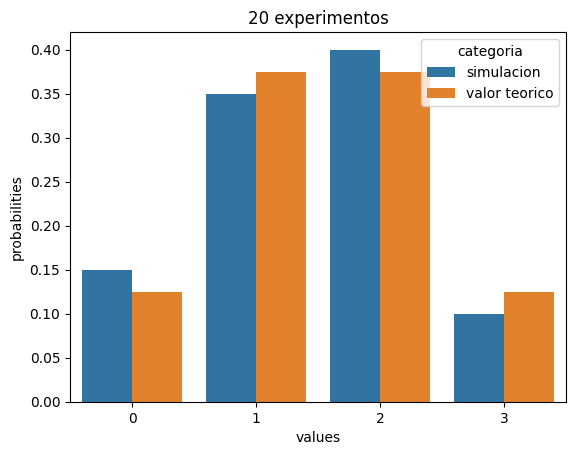

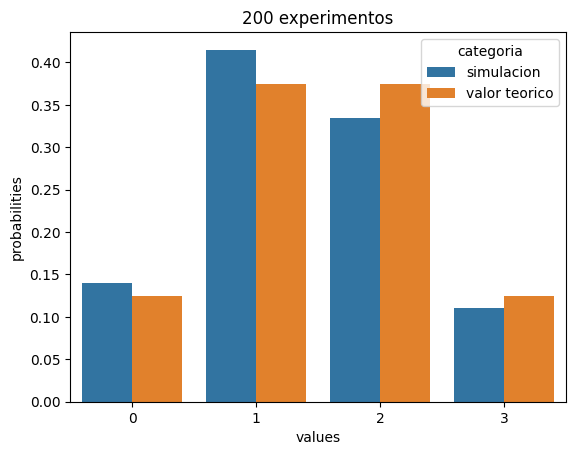

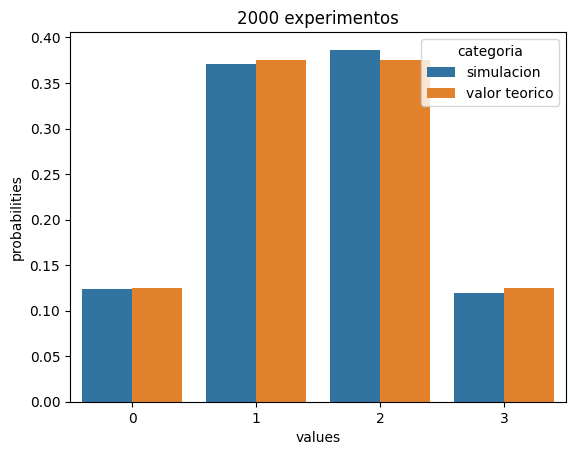

In [ ]:
plot_binomial_seaborn(20)
plot_binomial_seaborn(200)
plot_binomial_seaborn(2000)

*Note que a medida que n incrementa, los **resultados experimentales se aproximan mas a los resultados teoricos***

## Distribucion Multinomial

*Es una distribucion que sigue la formula:*

![Picture title](image-20221227-103857.png)

## Distribucion de Poisson

Para que X sea una variable aleatoria con distribucon de Poisson:

- X representa el numero de veces que ocurre un evento durante un intervalo definido 

**La probabilidad de que un evento ocurra x veces en un invervalo de tiempo es:**

$P(X=x) = \frac{e^{-\mu}\mu^{x}}{x!}$

*con $ \mu \geq 0 $*

***Ejemplo:***

Un veterinario recibe en promedio $\mu$ = 4 pacientes al dia, sabiendo que el numero de pacientes que llegan en un dia sigue una distribucion de poisson, calcula:

- la probabilidad de que lleguen 3 pacientes en un dia
- la probabilidad de que llegues 5 pacientes en un dia

***Solucion:***

- Probabilidad de 3 pacientes:

$P(X=3) = \frac{e^{-4}4^{3}}{3!} = 0.1954 = 19.54$%

- Probabilidad de 5 pacientes:

$P(X=5) = \frac{e^{-4}4^{5}}{5!} = 0.1563 = 15.63$%



### Supuestos

<img src="image-20221228-072232.png" alt="drawing" style="width:600px;"/>

### Distribucion de Poisson Scipy

*Esta libreria permite construir la distribucion dado:*

*- un valor* $\mu$ *Que representa la ocurrencia del evento en el intervalo*

***Se recrea el ejercicio del veterinario:***
- ***en promedio llegan 4 perros en un dia, Cual es la posibilidad de que lleguen 3 perros en un dia?***

*Para obtener la probabilidad de tener 3 ocurrencias uso el atributo **.pmf()** (probability mass function)*

In [ ]:
from scipy.stats import poisson

# Se define la distribucion con lambda = 4
dist = poisson(4)

# Probabilidad de 3
dist.pmf(3)

0.1953668148131645

***Se recrea otro ejercicio:***
- ***en promedio llegan 4 perros en un dia, cual es la probabilidad de que lleguen hasta 3 perros en un dia?***

*Ahora, para obtener la probabilidad de tener 3 eventos o menos, uso el atributo **.cdf()** (cumulative density function).*

- *A esto tambien se le llama **Distribucion de probabilidad acumulada***

In [ ]:
dist.cdf(3)

0.43347012036670896

*Recuerda que la probabilidad de **hasta 3** es la **suma de las probabilidades de 0,1,2,3***

In [ ]:
dist.pmf(0)+dist.pmf(1)+dist.pmf(2)+dist.pmf(3)

0.43347012036670884

### Simulando la Distribucion de Poisson con Numpy

*La funcion **poisson** de **np.random** genera experimentos aleatorios con distribucion de Poisson.*
- *los parametros son el **lambda** y el **tamano de la muestra***

In [ ]:
import numpy as np
from numpy.random import poisson   # Random number generator based on the poisson distribution
import matplotlib.pyplot as plt

In [ ]:
# Parametros son el lambda y el tamano de la distribucion
def plot_poisson_seaborn(average, sample_size):
    
    poissondist = np.random.poisson(average, sample_size)

    xvalues = np.unique(poissondist, return_counts=True)[0]

    simulacion = np.unique(poissondist, return_counts=True)[1]/len(poissondist)

    teorica = [scipy.stats.poisson(average).pmf(k) for k in xvalues]

    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(9,6))
    fig.suptitle('Simulacion Dist. Poisson, n={}'.format(sample_size))
    fig.tight_layout()
    axes[0].bar(xvalues, simulacion)
    axes[0].set_title("Resultado Experimental, Lambda = {}".format(average))
    axes[0].set_xticks(xvalues)
    axes[1].bar(xvalues, teorica)
    axes[1].set_title("Resultado Teorico, Lambda = {}".format(average))
    axes[1].set_xticks(xvalues)
    plt.show()

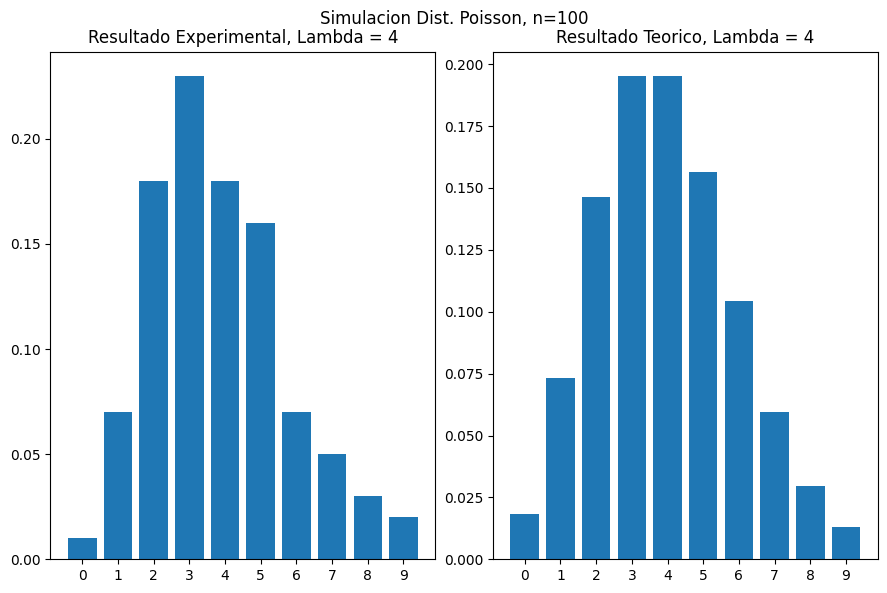

In [ ]:
plot_poisson_seaborn(4, 100)

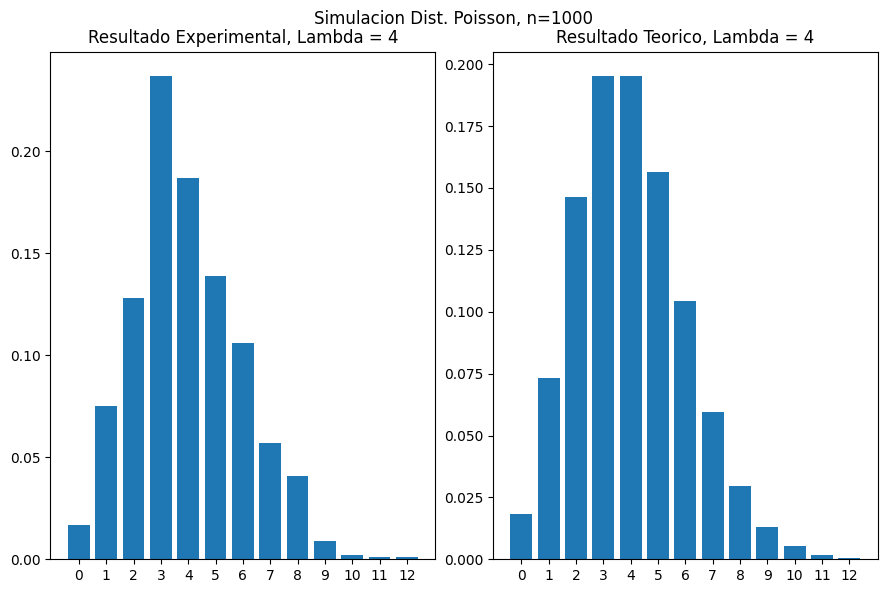

In [ ]:
plot_poisson_seaborn(4, 1000)

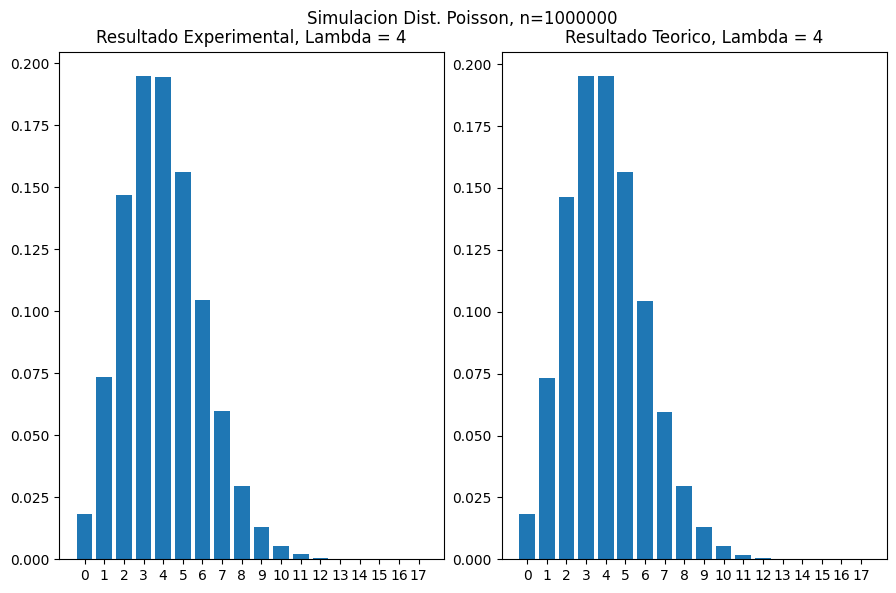

In [ ]:
plot_poisson_seaborn(4, 1000000)

## Distribucion Geometrica

## Distribucion Hipergeometrica

## Distribucion Binomial negativa

# Distribuciones de probabilidad continua

## Distribucion Normal (Gaussiana)

<img src="image-20221229-153914.png" alt="drawing" style="width:600px;"/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

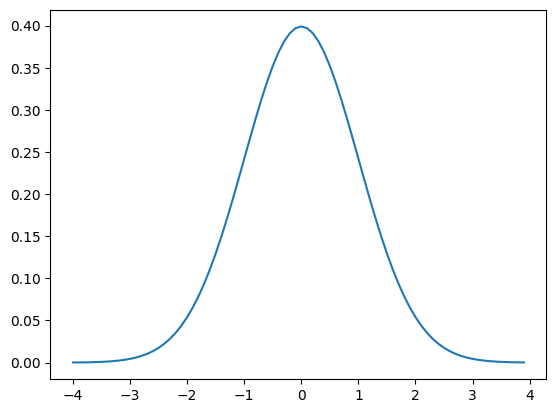

In [ ]:
# Se define un eje X
x = np.arange(-4,4,0.1)

# Se define una distribucion normal con media=0 y desv=1
y = gaussian(x, 0.0, 1)

# Se grafica
plt.plot(x,y)

## Distribucion normal de scipy

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

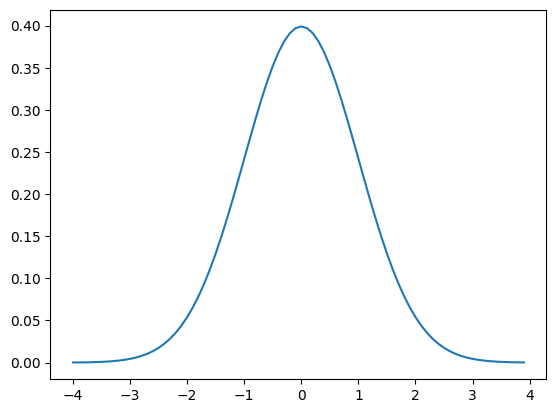

In [ ]:
dist_norm = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist_norm.pdf(value) for value in x]
plt.plot(x,y)

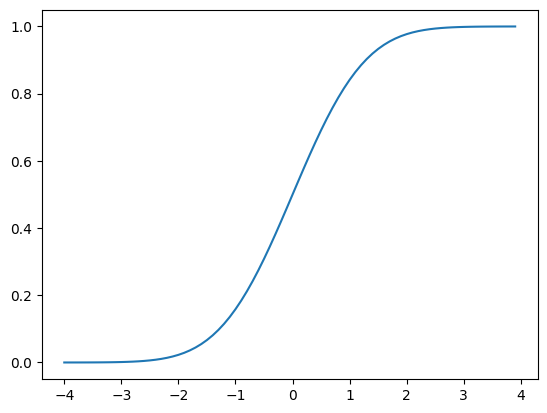

In [ ]:
dist_norm = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist_norm.cdf(value) for value in x]
plt.plot(x,y)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("s057.xls")

df

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,length (x.1mm),NaN,NaN,NaN
3,36,NaN,Bin,Frequency
4,37,NaN,36-38,2
...,...,...,...,...
98,52,NaN,NaN,NaN
99,53,NaN,NaN,NaN
100,53,NaN,NaN,NaN
101,54,NaN,NaN,NaN


*La informacion relevate esta contenida en la columna **"Normally Distributed Housefly Wing Lengths"***

In [ ]:
wingdata = df["Normally Distributed Housefly Wing Lengths"].values[4:]

*Ahora, calculemos la probabilidad de cada uno de estos datos*

<BarContainer object of 19 artists>

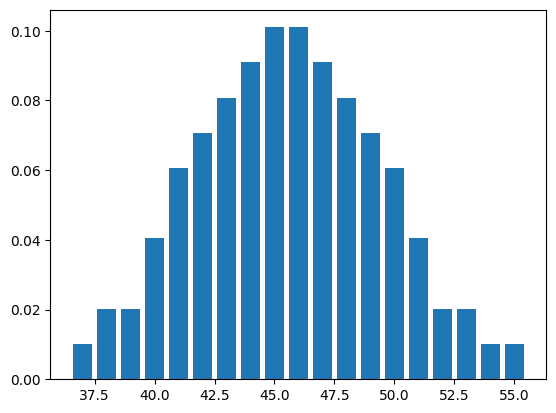

In [ ]:
values, dist = np.unique(wingdata, return_counts=True)
plt.bar(values, (dist/len(wingdata)))

*Estimacion de la distribucion*

<BarContainer object of 19 artists>

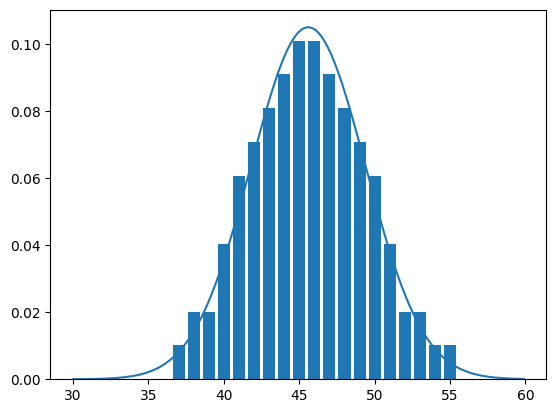

In [ ]:
mu = wingdata.mean()
sigma = wingdata.std()
x = np.arange(30, 60, 0.1)
dist = norm (mu, sigma)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)
values, dist = np.unique(wingdata, return_counts=True)
plt.bar(values, dist/len(wingdata))

## Distribucion Exponencial

## Distribucion Paretto

## Distribucion Gamma

## Distribucion Beta

# Como estimar una distribucion de probabilidad?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm

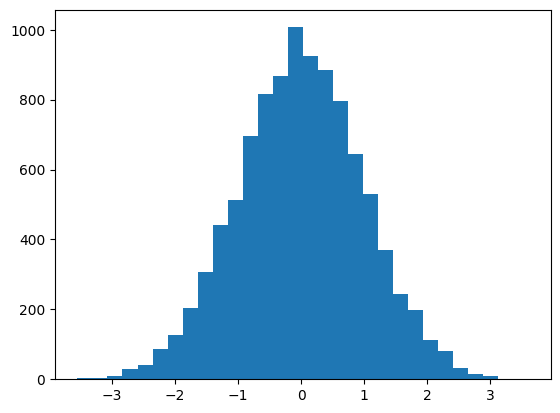

In [ ]:
sample = normal(size=10000)
plt.hist(sample, bins=30)
plt.show()

## Estimacion parametrica

***Paso 1.** Se genera una muestra aleatoria con distribucion normal*

- *Esto se hace con **numpy.random.normal***
- *En este caso la distribucion tiene media = 50 y desviacion = 5*

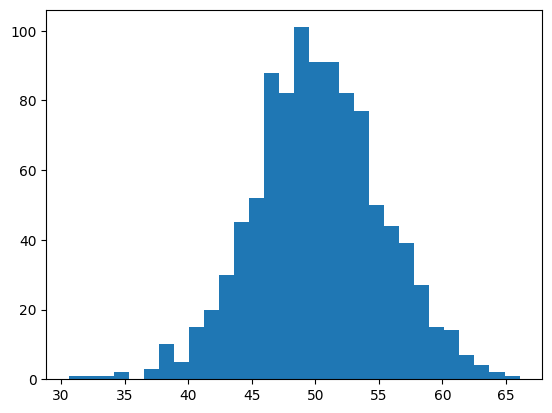

In [ ]:
# Distrib normal con mu = 50, sigma = 5
sample = normal(loc=50, scale=5, size = 1000)
plt.hist(sample, bins=30)
plt.show()

*Entonces supongamos que tenemos un conjunto de datos cuya distribucion y parametros no conocemos* 😉😉😉

***Paso 2.** una vez se tienen los datos simulados, se procede a ajustar una funcion con sus parametros*

In [ ]:
# calcular parametros de la muestra
mu = sample.mean()
sigma= sample.std()

#generar una distribucion normal con los parametros calculados
dist = norm(mu, sigma)

# Y se obtienen las probabilidades de cada dato
values = np.arange(30,70,1)
probabilidades = [dist.pdf(i) for i in values]

*Por ultimo se grafican los datos originales y la distribucion calculada para ver si se ajusta correctamente*

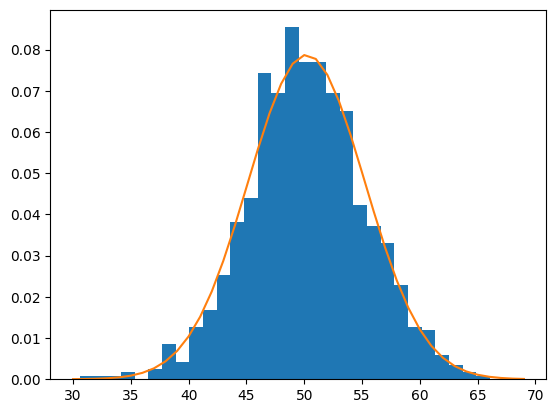

In [ ]:
# Density = True hace que el grafico muestre probabilidades en lugar de frecuencias
plt.hist(sample, bins = 30, density = True)
plt.plot(values, probabilidades)
plt.show()

## Estimacion no parametrica

*Este proceso se aplica cuando los datos no se ajustan a una distribución conocida, Por lo cual no se pueden forzar a los datos a ajustarse a una unica distribucion*

*Se genera aleatoriamente un dataset con distribucion bimodal*

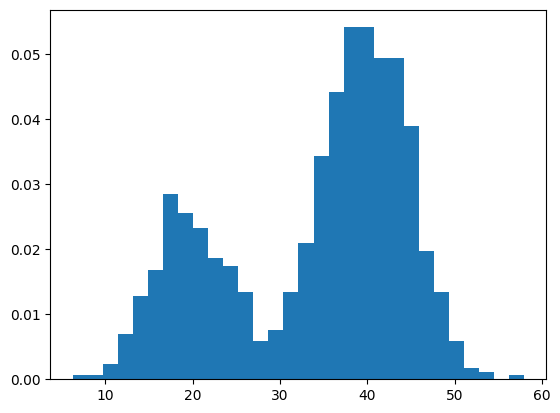

In [ ]:
import numpy as np

sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))
plt.hist(sample, bins = 30, density = True)
plt.show()

*Se aplica el metodo de **Kernel Density Estimation(KDE)***

*una vez se tienen los datos simulados, comienza el proceso de estimación:

- *1. Se crea un objeto modelo, con parámetros bandwidth= (parámetro de suavizado) y kernel= (funciones de distribución que se usan para la estimación).*
- *2. Una vez creado el objeto, se ajustan los datos a las necesidades del objeto, para esto se utiliza el método reshape, para ordenar en una matriz de 1000 filas y 1 columna y luego se ajusta el modelo a estos datos:*

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=2, kernel="gaussian")
sample = sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(bandwidth=2)

*Ahora se ajusta el modelo (o la distribucion que queremos predecir) a los datos, como si se estuviese calculando la media y la desviacion estandar de una distribución normal, pero nos faltan calcular los promedios de cada Kernel para darle forma a la función teórica. Esto es lo que hacemos a continuación:*

- *se crea un eje x en el rango obetenido, luego calculamos las probabilidades.*

- *Aclaración: la probabilidad sale en forma logarítimica(por cuestiones de eficiencia), Luego a través de función exponencial se revierte este efecto.*

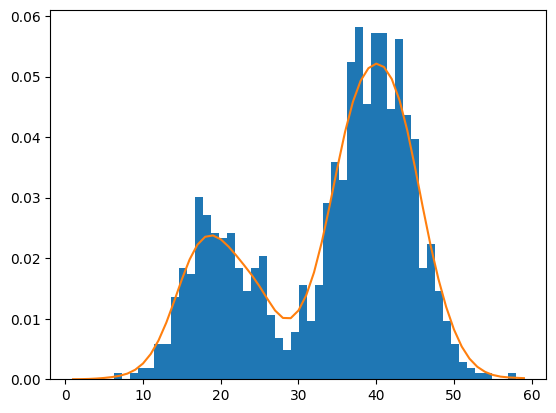

In [ ]:
values = np.arange(1,60,1)
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) # probabilidad logaritmica (computacionalmente mas barato)
probabilities = np.exp(probabilities) # se regresa a las probabilidades originales

# Datos originales
plt.hist(sample, bins=50, density=True)
#Curva ajustada
plt.plot(values, probabilities)
plt.show()

## Maximum Likelihood Estimation (MLE)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

1. Escoger una distribucion
2. Escoger los parametros de la distribucion

In [2]:
def likelihood(y, yp):
    return yp*y+(1-yp)*(1-y)

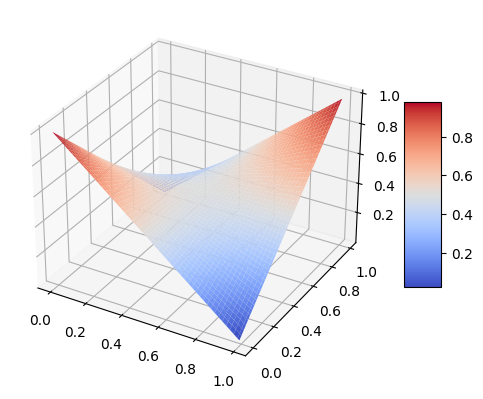

In [3]:
fig = plt.figure()
#ax = fig.gca(projection="3d")
ax = fig.add_subplot(projection='3d')

Y = np.arange(0,1,0.01)
YP = np.arange(0,1,0.01)
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

surf = ax.plot_surface(Y, YP,Z, cmap = cm.coolwarm)
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [6]:
atrib_names = ["sepal length", "sepal width", "petal length", "petal width"]
X, y = load_iris(return_X_y=True)

In [7]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
clf = LogisticRegression(random_state=10, solver="liblinear").fit(X[:100], y[:100])

Revisamos los parametros resultantes $\beta_{1}$

In [10]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d513e9b5-dbb0-4a42-95c1-6aa9a996ed5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>